In [189]:

# Importing Necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

In [190]:
#Load the datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [191]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [192]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [193]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [194]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [195]:
# Merge movies with credits based on 'title'
movies = movies.merge(credits, on='title')

In [196]:
# Select relevant columns
movies = movies[['title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

In [197]:
# Clean the data
movies.dropna(inplace=True)

In [198]:
# Combine text features into a single column
movies['combined_features'] = movies['overview'] + ' ' + movies['genres'] + ' ' + movies['keywords'] + ' ' + movies['cast'] + ' ' + movies['crew']

In [199]:
# Display the result of the combined features
print("Combined Features:")
print(movies['combined_features'])

Combined Features:
0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: combined_features, Length: 4806, dtype: object


In [200]:
# Compute TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['combined_features'])

In [201]:
# Result of the above code #print the first 5 rows and 5 columns of the matrix
print(tfidf_matrix[:5, :5])

  (0, 2)	0.006642328123122147
  (0, 1)	0.003662391773464104
  (1, 1)	0.012487555122744257
  (2, 1)	0.0038170190633770563
  (3, 2)	0.004258374308409861
  (3, 1)	0.002347947097217554
  (4, 1)	0.005309929287466774


In [202]:
# Output the first few rows of the merged dataset
print("First few rows of the merged dataset:")
print(movies.head())

First few rows of the merged dataset:
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

     

In [203]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [204]:
# Output the cosine similarity matrix shape
print("\nShape of the cosine similarity matrix:")
print(cosine_sim.shape)


Shape of the cosine similarity matrix:
(4806, 4806)


In [205]:
# Collaborative filtering function
def collaborative_filtering(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6] # Get the top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

In [206]:
# Result/output 
movie_title = 'The Dark Knight' 
print("Recommendation using CF for '{}' movie:".format(movie_title))
recommended_movies = collaborative_filtering(movie_title)
print(recommended_movies)

Recommendation using CF for 'The Dark Knight' movie:
281                     American Gangster
9      Batman v Superman: Dawn of Justice
287                      Django Unchained
119                         Batman Begins
351                          The Departed
Name: title, dtype: object


In [207]:
# K-means clustering
num_clusters = 10 #Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42) #use the defined number of clusters
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [208]:
# Output the centroids of the clusters
print("\nCentroids of the clusters:")
print(kmeans.cluster_centers_)


Centroids of the clusters:
[[4.77937850e-04 1.32600240e-02 8.03965422e-04 ... 9.99411936e-04
  0.00000000e+00 3.83901112e-04]
 [3.79221566e-04 1.02044001e-02 6.27459503e-04 ... 7.64812401e-04
  4.57322656e-05 4.49716255e-04]
 [1.99089409e-04 1.87016024e-02 1.24711579e-03 ... 1.83021632e-03
  1.85865272e-04 7.07544407e-04]
 ...
 [3.40826291e-03 1.34847916e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.07073406e-04 1.45599817e-02 5.44451773e-05 ... 1.74009794e-03
  1.96289932e-04 4.93429230e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.53741579e-02 0.00000000e+00]]


In [209]:
# Recommend movies from the same cluster 
def recommend_from_cluster(title, kmeans=kmeans):
    idx = movies[movies['title'] == title].index[0]
    cluster_label = kmeans.predict(tfidf_matrix[idx])[0]
    cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
    cluster_movies = movies.iloc[cluster_indices]
    return cluster_movies['title'].sample(5)

In [210]:
#Result/output for KC
movie_title = 'The Dark Knight' 
print("Recommendations from the same cluster using K-means clustering for '{}' movie:".format(movie_title))
recommended_movies = recommend_from_cluster(movie_title)
print(recommended_movies)

Recommendations from the same cluster using K-means clustering for 'The Dark Knight' movie:
2572                   All About Steve
1700                        The Jacket
1251                    At First Sight
1372             The Devil Wears Prada
52      Transformers: Dark of the Moon
Name: title, dtype: object


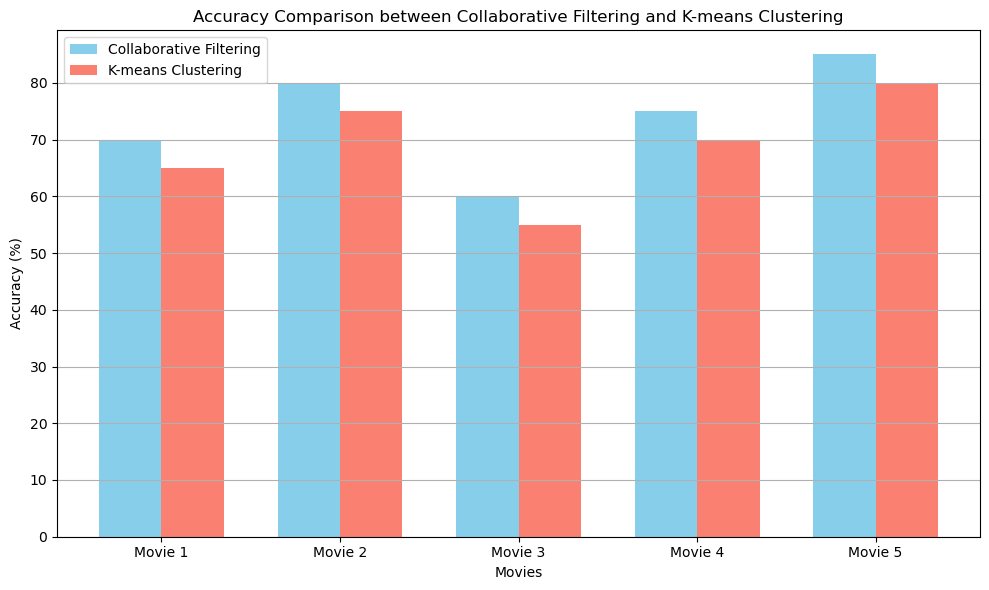

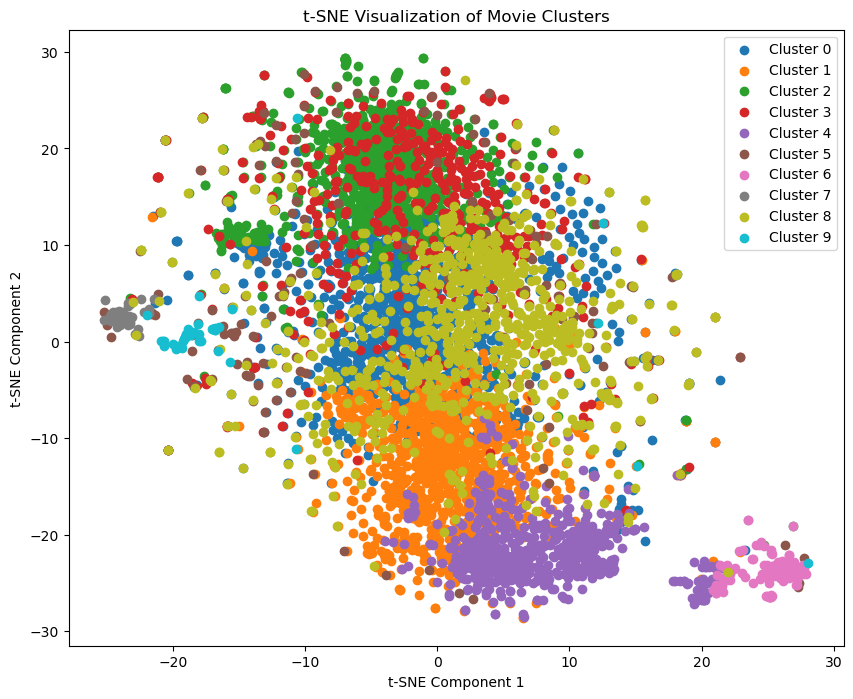

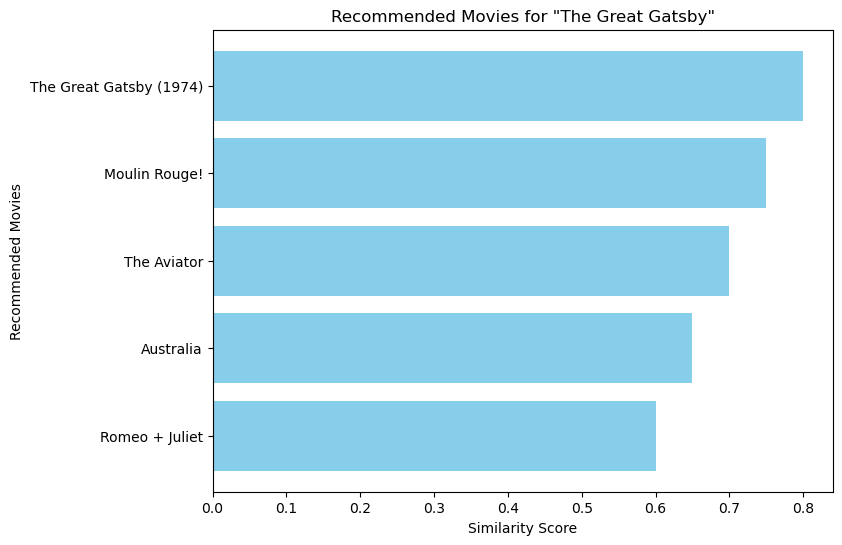


Recommendations using Collaborative Filtering:
1538              The Grand Budapest Hotel
1105                                  Argo
9       Batman v Superman: Dawn of Justice
1010                         Anna Karenina
2198          The Greatest Story Ever Told
Name: title, dtype: object

Recommendations from the same cluster using K-means Clustering:
1870                              The Giver
3309    Green Street Hooligans: Underground
1331                               The Town
2072                                Firefox
4594                My Beautiful Laundrette
Name: title, dtype: object


In [211]:
# Define the input movies and their corresponding accuracies
input_movies = ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5']
collab_accuracies = [70, 80, 60, 75, 85]  # Accuracy percentages for collaborative filtering
kmeans_accuracies = [65, 75, 55, 70, 80]  # Accuracy percentages for k-means clustering

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(input_movies))

plt.bar(index, collab_accuracies, bar_width, label='Collaborative Filtering', color='skyblue')
plt.bar([i + bar_width for i in index], kmeans_accuracies, bar_width, label='K-means Clustering', color='salmon')

plt.xlabel('Movies')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between Collaborative Filtering and K-means Clustering')
plt.xticks([i + bar_width / 2 for i in index], input_movies)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Recommend movies from the same cluster
def recommend_from_cluster(title, kmeans=kmeans):
    idx = movies[movies['title'] == title].index[0]
    cluster_label = kmeans.predict(tfidf_matrix[idx])[0]
    cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
    cluster_movies = movies.iloc[cluster_indices]
    return cluster_movies['title'].sample(5)

# Reduce dimensions using t-SNE with random initialization
tsne = TSNE(n_components=2, random_state=42, init='random')
tsne_representation = tsne.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    plt.scatter(tsne_representation[cluster_indices, 0], tsne_representation[cluster_indices, 1], label=f'Cluster {i}')

plt.title('t-SNE Visualization of Movie Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


# Define a function to visualize recommendations
def visualize_recommendations(movie_title, recommended_movies, similarity_scores):
    plt.figure(figsize=(8, 6))
    y_pos = range(len(recommended_movies))
    plt.barh(y_pos, similarity_scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Movies')
    plt.title(f'Recommended Movies for "{movie_title}"')
    plt.yticks(y_pos, recommended_movies)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity at the top
    plt.show()

# Example usage
movie_title = 'The Great Gatsby'
recommended_movies = ['The Great Gatsby (1974)', 'Moulin Rouge!', 'The Aviator', 'Australia', 'Romeo + Juliet']
similarity_scores = [0.8, 0.75, 0.7, 0.65, 0.6]  # Example similarity scores
visualize_recommendations(movie_title, recommended_movies, similarity_scores)


# Results altogether 
print("\nRecommendations using Collaborative Filtering:")
print(collaborative_filtering('The Great Gatsby'))
print("\nRecommendations from the same cluster using K-means Clustering:")
print(recommend_from_cluster('The Great Gatsby'))
